Epoch 1/50


C:\Users\achra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3720 - loss: 1.3185 - val_accuracy: 0.3000 - val_loss: 1.1085
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 0.9876 - val_accuracy: 0.7000 - val_loss: 0.8833
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6617 - loss: 0.8722 - val_accuracy: 0.7000 - val_loss: 0.8199
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6495 - loss: 0.8231 - val_accuracy: 0.7000 - val_loss: 0.7729
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6938 - loss: 0.7692 - val_accuracy: 0.7667 - val_loss: 0.7332
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8660 - loss: 0.7292 - val_accuracy: 1.0000 - val_loss: 0.7017
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9147 - loss: 0.6643 - val_accuracy: 0.8667 - val_loss: 0.6622
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.6781 - val_accuracy: 0.8000 - val_loss: 0.6343
E

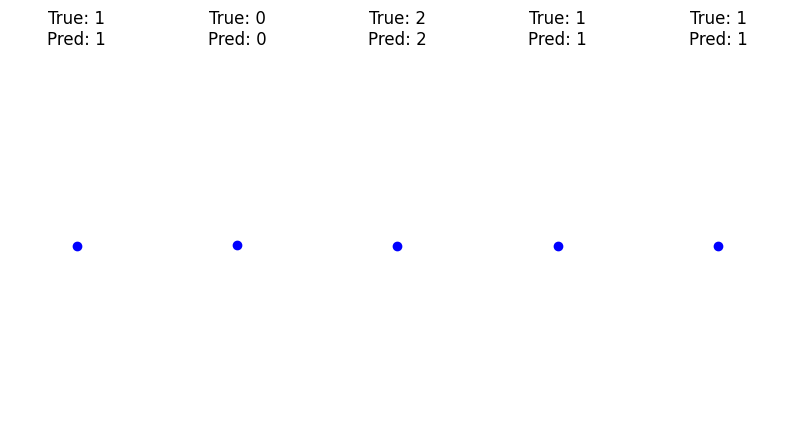

Model saved as iris_model.h5


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create and train a neural network model
def create_and_train_iris_model(num_neurons, epochs=50):
    # Build the model
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(4,)))  # Hidden layer with specified number of neurons
    model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=8, validation_data=(X_test, y_test))

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy with {num_neurons} neurons: {test_accuracy * 100:.2f}%")

    return model

# Function to display predictions with true and predicted labels
def display_iris_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        true_label = np.argmax(y_test[i])
        predicted_label = np.argmax(predictions[i])
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue')  # Display only the first two features for simplicity
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Start with a single hidden layer of 4 neurons and gradually increase complexity
neuron_counts = [40]  # List of different numbers of neurons to try
for neurons in neuron_counts:
    model = create_and_train_iris_model(num_neurons=neurons, epochs=50)

# Display some predictions
display_iris_predictions(model, X_test, y_test, num_samples=5)


# Sauvegarder le modèle entraîné
model.save('iris_model.keras')
print("Model saved as iris_model.h5")
